# EDA

## Data Description:

The detailed data dictionary is given below:

* Suburb - Suburb in which the property is located
* Rooms - Number of rooms in the property
* Type - Type of the property like
    * h - house,cottage,villa, semi,terrace,
    * t - townhouse,
    * u - unit, duplex
* SellerG - Name of the real estate agent who sold the property
* Date - Date on which the property was sold
* Distance - Distance of the property from CBD in kilometres. CBD is the central business district of the city.
* Postcode - Postcode of the area
* Bedroom - Number of bedrooms in the property
* Bathroom - Number of bathrooms in the property
* Car - Number of car parking spaces in the property
* Landsize - Size of the land in square metres
* BuildingArea - Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.)
* YearBuilt - Year in which the building was built
* Regionname - Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.
* Propertycount - Number of properties that are present in the suburb
* Price - price (in AUD) at which the property was sold

# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Numpy_Pandas/EDA')
os.listdir()

['Copy of Copy of empty.ipynb',
 'boxplot.png',
 'Melbourne_Housing.csv',
 'Melbourne_Housing_NoMissing.csv',
 'Melbourne_Housing_NoOutliers.csv',
 'SM-Melbourne_Housing_NoMissing.csv',
 'Hands_on_Notebook_ExploratoryDataAnalysis.ipynb',
 'SM_EDA.ipynb']

# Notes etc

## Univariate and Bivariate
* Univariate:  single column, just looking to understand
* Bivariate:  Columns that have a relationship, like property_size and price

## Other things to look at
* Missing Values
* Outliers

# Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install plotly
import plotly.express as px


# Melbourne_Housing

In [ ]:
data = pd.read_csv('Melbourne_Housing.csv')
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
data.size

433824

In [ ]:
data.shape

(27114, 16)

In [ ]:
27114*16

433824

In [ ]:
data.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Propertycount,Price
count,27114.000000,27113.000000,27113.000000,20678.000000,20672.000000,20297.000000,17873.000000,11985.000000,27114.000000,2.711400e+04
mean,2.992218,11.278737,3113.782687,3.046184,1.591525,1.715820,560.536564,1966.618273,7564.205245,1.050564e+06
std,0.954722,6.783544,111.114271,0.955024,0.701106,0.994487,1411.309127,36.042000,4493.596054,6.415785e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,50.000000,1850.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,220.000000,1950.000000,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,513.000000,1970.000000,6567.000000,8.710000e+05
75%,4.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,2000.000000,10412.000000,1.300000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,76000.000000,2019.000000,21650.000000,1.120000e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


## Problems from above
* Date is an object
* BuildingArea is an object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst  = True) # did not work without dayfirst=True

# Look why BuildingArea is an object

* there is 'inf and 'missing'
* the rest of them are strings, i.e. '225'

In [ ]:
data['BuildingArea'].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

# fix BuildingArea type

In [ ]:
data['BuildingArea'].apply(type)


0          <class 'str'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
              ...       
27109      <class 'str'>
27110      <class 'str'>
27111      <class 'str'>
27112    <class 'float'>
27113      <class 'str'>
Name: BuildingArea, Length: 27114, dtype: object

In [ ]:
data['BuildingArea'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [ ]:
data['BuildingArea'].apply(type).value_counts()

BuildingArea
<class 'float'>    16571
<class 'str'>      10543
Name: count, dtype: int64

## fixing this, replacing 'missing' and 'inf' with nan

In [ ]:
data['BuildingArea'] = data['BuildingArea'].replace(['missing', 'inf'], np.nan)

## now change to float


In [ ]:
data['BuildingArea'] = data['BuildingArea'].astype(float)

In [ ]:
data.info() # BuildingArea is now all float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [ ]:
data['BuildingArea'].apply(type).value_counts()

BuildingArea
<class 'float'>    27114
Name: count, dtype: int64

In [ ]:
data['BuildingArea'].unique() # everything is now float

array([ 225.    ,   82.    ,       nan,  263.    ,  242.    ,  251.    ,
        117.    ,   76.    ,  399.    ,  118.    ,  103.    ,  180.    ,
        123.    ,  218.    ,  129.    ,  167.    ,  154.    ,  275.    ,
        121.    ,  125.    ,  255.    ,   75.    ,  156.    ,  240.    ,
        268.    ,  108.    ,   69.    ,  140.    ,  214.    ,  253.    ,
        189.    ,  215.    ,   96.    ,  104.    ,  100.    ,  313.    ,
        144.    ,   93.    ,  110.    ,   70.    ,  122.    ,   51.    ,
        147.    ,  113.    ,   83.    ,   56.    ,  137.    ,   85.    ,
         64.    ,  175.    , 3558.    ,  170.    ,  265.    ,  353.    ,
        138.    ,   19.    ,  116.    ,   87.    ,   74.    ,  320.    ,
        300.    ,  210.    ,  120.    ,   86.    ,   97.    ,  200.    ,
        106.    ,   14.    ,  161.    ,  128.    ,  185.    ,  146.    ,
        133.    ,  115.    ,  143.    ,  150.    ,  195.    ,  236.    ,
        276.    ,  188.    ,  179.    ,  249.    , 

## Another good trick  while importing csv

In [ ]:
# while importing file, if any cell has "missing" or 'inf' convert them to NaN
data_new = pd.read_csv('Melbourne_Housing.csv', na_values = ['missing', 'inf'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB


In [ ]:
data_new['BuildingArea'].value_counts().unique()

array([152, 128, 126, 123, 121, 115, 114, 101,  93,  88,  87,  85,  83,
        82,  81,  80,  79,  78,  77,  76,  75,  73,  72,  71,  70,  69,
        68,  67,  66,  64,  62,  61,  59,  58,  56,  55,  54,  53,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,
        11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [ ]:
data_new['BuildingArea'].apply(type).value_counts()

BuildingArea
<class 'float'>    27114
Name: count, dtype: int64

## checking for missing values

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
data.isnull() # gives you True/False  True means it null

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27110,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
27111,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
27112,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

# Checking for duplicates

In [ ]:
data.duplicated().sum() # gives you how many rows have duplicate entries

11

## drop Duplicates

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
data.reset_index(drop=True, inplace=True) # reset the index, since some rows have been dropped, drop=True means drop the old index value

In [ ]:
data.describe().T


,count,mean,min,25%,50%,75%,max,std
Rooms,27103.0,2.992473,1.0,2.0,3.0,4.0,16.0,0.954667
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.0,11.279931,0.0,6.4,10.5,14.0,48.1,6.783958
Postcode,27102.0,3113.787322,3000.0,3046.0,3088.0,3153.0,3978.0,111.129025
Bedroom,20678.0,3.046184,0.0,2.0,3.0,4.0,20.0,0.955024
Bathroom,20672.0,1.591525,0.0,1.0,1.0,2.0,9.0,0.701106
Car,20297.0,1.71582,0.0,1.0,2.0,2.0,18.0,0.994487
Landsize,17873.0,560.536564,50.0,220.0,513.0,664.0,76000.0,1411.309127
BuildingArea,10529.0,154.511857,11.0,101.0,133.0,183.0,6791.0,130.583872
YearBuilt,11985.0,1966.618273,1850.0,1950.0,1970.0,2000.0,2019.0,36.042


In [ ]:
data['Postcode'].nunique()

209

In [ ]:
data['Postcode'].unique().size

210

In [ ]:
data['Postcode'].isna().sum()

1

## List of all categorical variables

In [ ]:
cat_cols = ['Suburb', 'Type', 'SellerG', 'Regionname']
cat_cols

['Suburb', 'Type', 'SellerG', 'Regionname']

In [ ]:
for column in cat_cols:
  print(data[column].value_counts())
  print("_" * 50)

Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
__________________________________________________
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
__________________________________________________
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
__________________________________________________
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

In [ ]:
for column in cat_cols:
  print(data[column].value_counts(normalize=True)) # to get percentage
  print("_" * 50)

Suburb
Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Wandin North      0.000037
Ferny Creek       0.000037
Tecoma            0.000037
Montrose          0.000037
viewbank          0.000037
Name: proportion, Length: 345, dtype: float64
__________________________________________________
Type
h    0.678670
u    0.217024
t    0.104306
Name: proportion, dtype: float64
__________________________________________________
SellerG
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Allan            0.000037
Jim              0.000037
iProperty        0.000037
Batty            0.000037
Icon             0.000037
Name: proportion, Length: 347, dtype: float64
__________________________________________________
Regionname
Southern Metropolitan         0.312880
Northern Metropolitan      

# Uniariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as st
import plotly.express as px

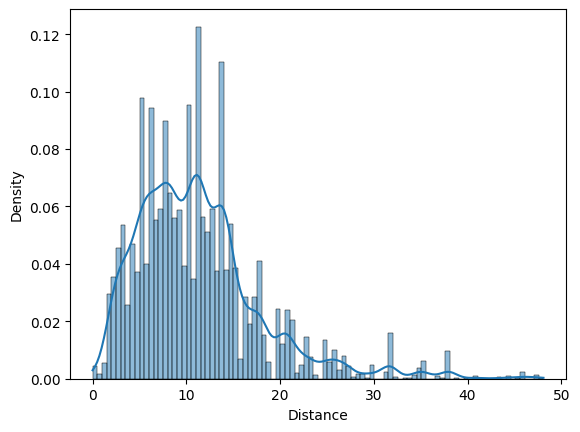

In [ ]:
sns.histplot(data=data, x='Distance', stat='density', kde=True); # used stat='density' instead of count

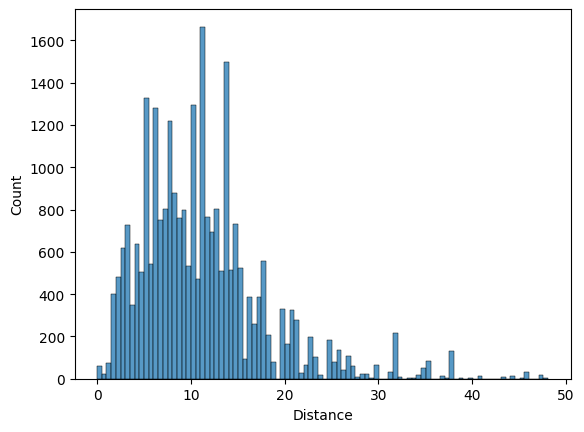

In [ ]:
sns.histplot(data=data, x='Distance');

<Axes: xlabel='Distance'>

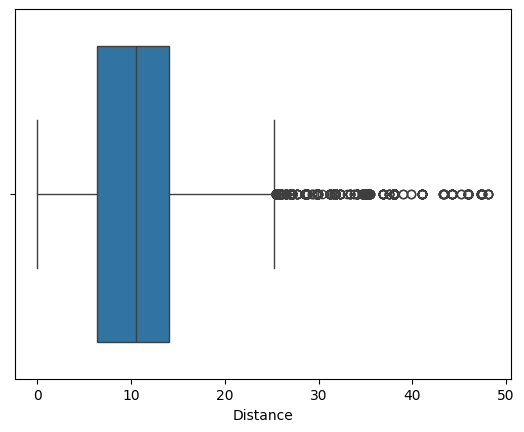

In [ ]:
sns.boxplot(data=data, x='Distance')

In [ ]:
fig = px.box(data, x='Distance', points='all');
fig.show()

In [ ]:
fig = px.box(data, x='Distance');
fig.show()

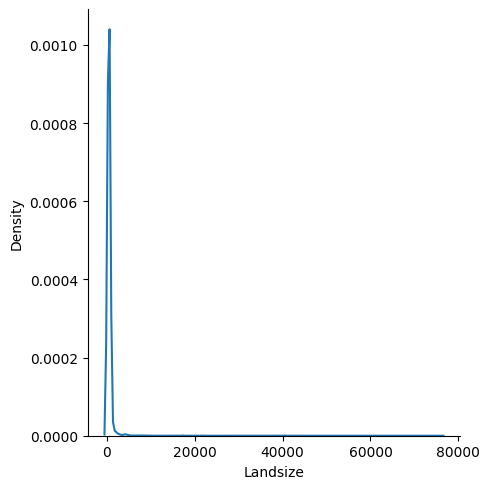

In [ ]:
sns.displot(data=data, x='Landsize', kind='kde')
plt.show()

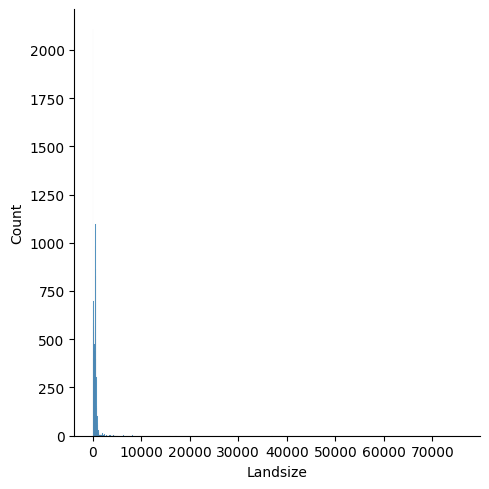

In [ ]:
sns.displot(data=data, x='Landsize', kind='hist')
plt.show()

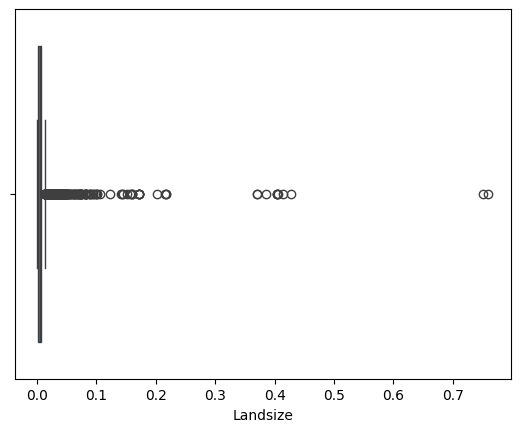

In [ ]:
sns.boxplot(data=data, x=data['Landsize']/100000);

In [ ]:
data.loc[data['Landsize'] > 60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


In [ ]:
data[data['Landsize'] > 60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


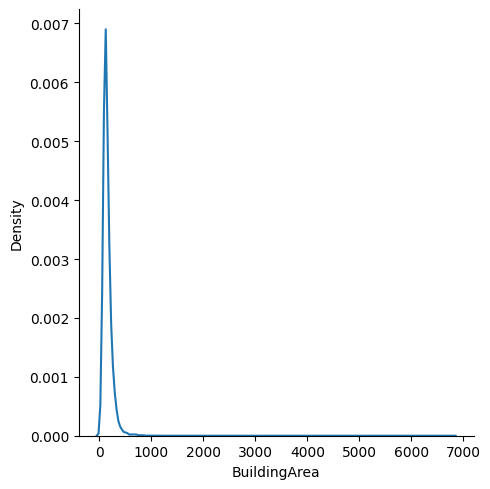

In [ ]:
sns.displot(data=data, x='BuildingArea', kind='kde');

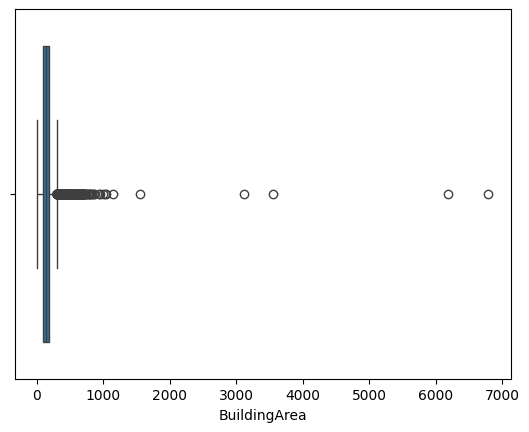

In [ ]:
sns.boxplot(data=data, x='BuildingArea');

In [ ]:
px.box(data, x='BuildingArea')

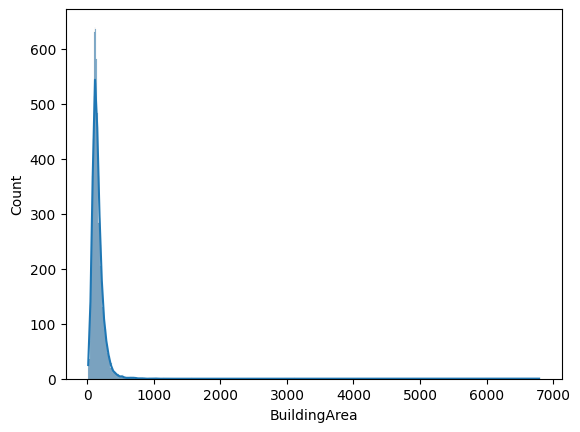

In [ ]:
sns.histplot(data=data, x='BuildingArea', kde=True);

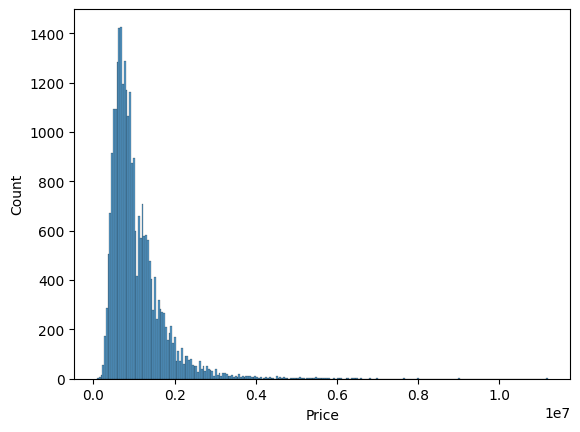

In [ ]:
sns.histplot(data=data, x='Price');

In [ ]:
px.box(data, x='Price')

In [ ]:
px.box(data, x='Rooms')

In [ ]:
data.loc[data['Rooms']>7].shape

(23, 16)

In [ ]:
data.loc[data['Rooms']>7]['Type'].value_counts()

Type
h    21
u     2
Name: count, dtype: int64

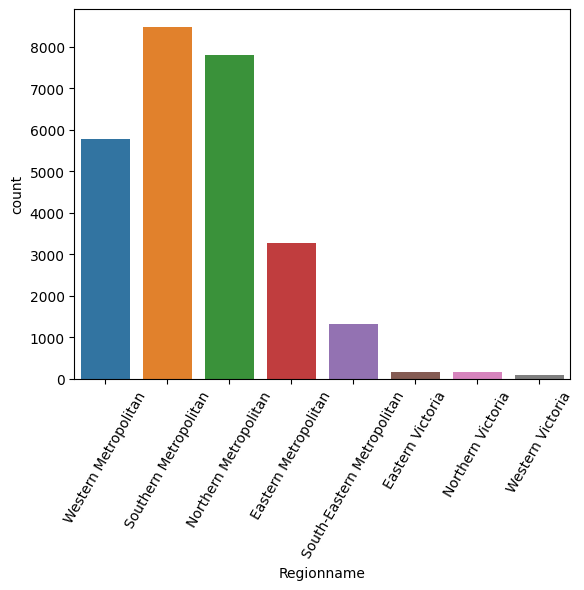

In [ ]:
sns.countplot(data=data, x='Regionname', hue='Regionname')
plt.xticks(rotation=60)
plt.show();

# Now Heatmap

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
dataC=data.copy()
dataC.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000


In [ ]:
data_numeric = dataC.select_dtypes(exclude=['object'])
data_numeric

,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price
0,3,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,3464,840000
1,2,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,3280,1275000
2,2,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,3280,1455000
3,4,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,2211,2000000
4,3,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,2211,1110000
...,...,...,...,...,...,...,...,...,...,...,...,...
27098,3,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,11806,627500
27099,3,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,21650,475000
27100,4,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,5833,591000
27101,3,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,4054,780500


In [ ]:
corr = data_numeric.corr()

In [ ]:
corr

,Rooms,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Price
Rooms,1.000000,0.108723,0.284292,0.081118,0.958584,0.608516,0.394298,0.071494,0.418217,-0.003780,-0.079686,0.465160
Date,0.108723,1.000000,0.268607,0.122068,0.229475,0.118897,0.172893,0.057952,0.077960,0.110658,0.012550,-0.013784
Distance,0.284292,0.268607,1.000000,0.490217,0.282802,0.140484,0.244562,0.118486,0.101988,0.320887,-0.021224,-0.211194
Postcode,0.081118,0.122068,0.490217,1.000000,0.087373,0.123812,0.062646,0.076461,0.060371,0.100183,0.024291,0.045016
Bedroom,0.958584,0.229475,0.282802,0.087373,1.000000,0.605910,0.395814,0.071124,0.412782,0.006388,-0.059713,0.430031
Bathroom,0.608516,0.118897,0.140484,0.123812,0.605910,1.000000,0.306358,0.055461,0.388836,0.186618,-0.040498,0.430852
Car,0.394298,0.172893,0.244562,0.062646,0.395814,0.306358,1.000000,0.091536,0.217719,0.133013,-0.013524,0.201333
Landsize,0.071494,0.057952,0.118486,0.076461,0.071124,0.055461,0.091536,1.000000,0.058050,0.044968,-0.020294,0.042792
BuildingArea,0.418217,0.077960,0.101988,0.060371,0.412782,0.388836,0.217719,0.058050,1.000000,0.078974,-0.041552,0.335843
YearBuilt,-0.003780,0.110658,0.320887,0.100183,0.006388,0.186618,0.133013,0.044968,0.078974,1.000000,0.026658,-0.340491


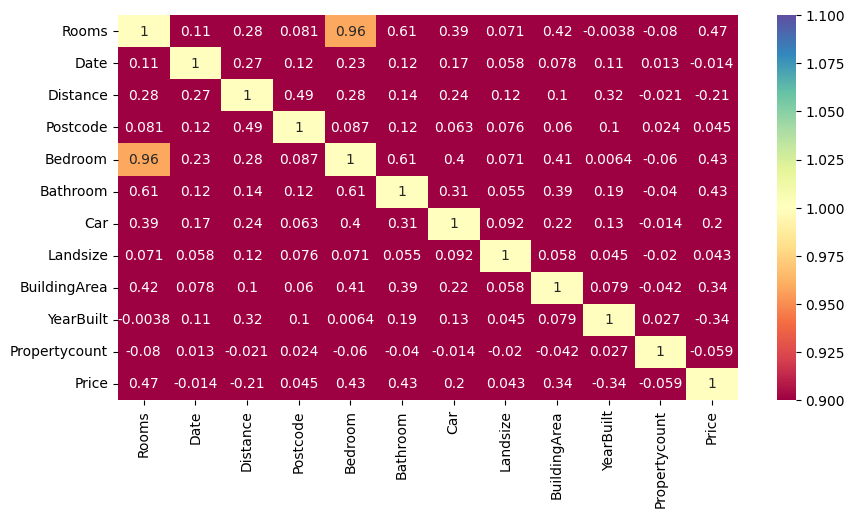

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=1, vmax=1);

# create new column `Total Space`

In [ ]:
data['TotalSpace'] = data['Rooms'] + data['Bedroom'] + data['Bathroom'] + data['Car']
data

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,13.0
27099,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,8.0
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,12.0
27101,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.0


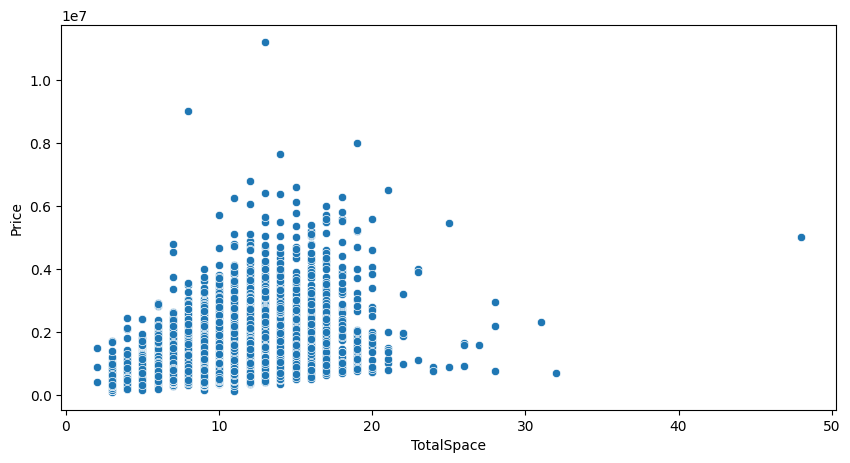

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='TotalSpace', y='Price');

## Outliers really effect the best fit (so, bad for linear regression)

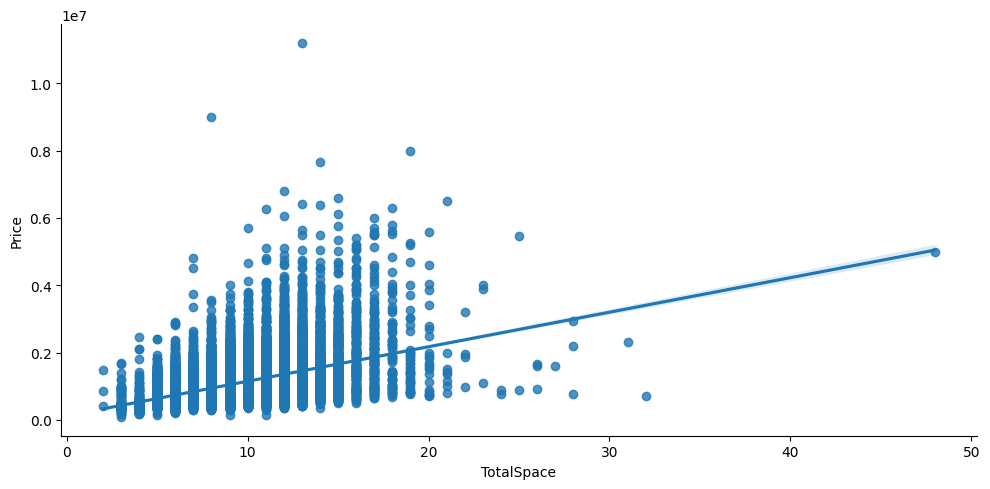

In [ ]:

sns.lmplot(data=data, x='TotalSpace', y='Price', height=5, aspect=2);

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'aspect'



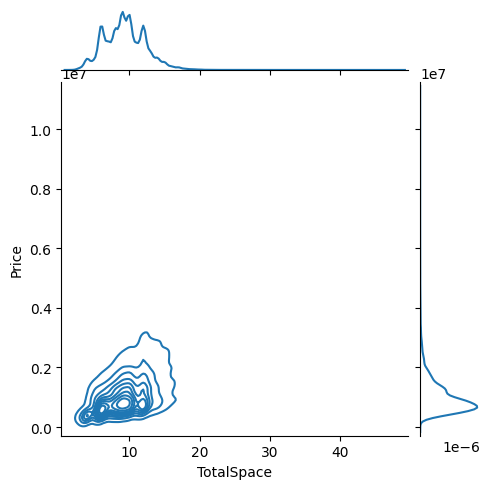

In [ ]:
sns.jointplot(data=data, x='TotalSpace', y = 'Price', kind="kde", height=5, aspect=2);

In [ ]:
data[['TotalSpace', 'Price']].corr()

,TotalSpace,Price
TotalSpace,1.000000,0.458282
Price,0.458282,1.000000


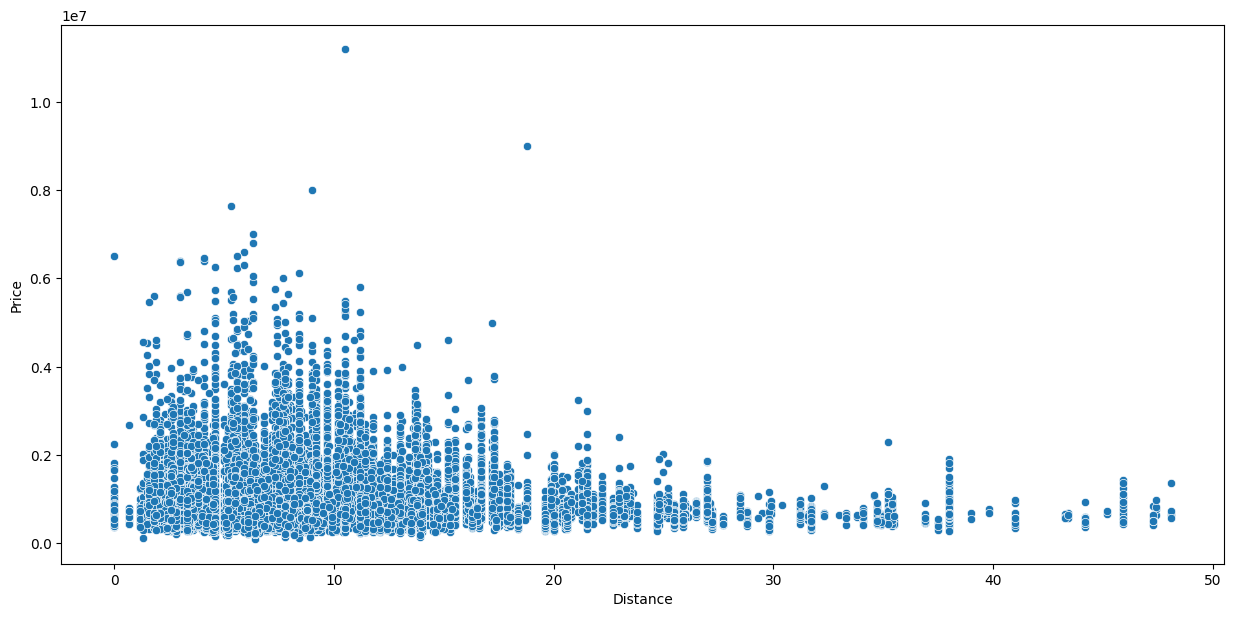

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=data, x='Distance', y = 'Price');

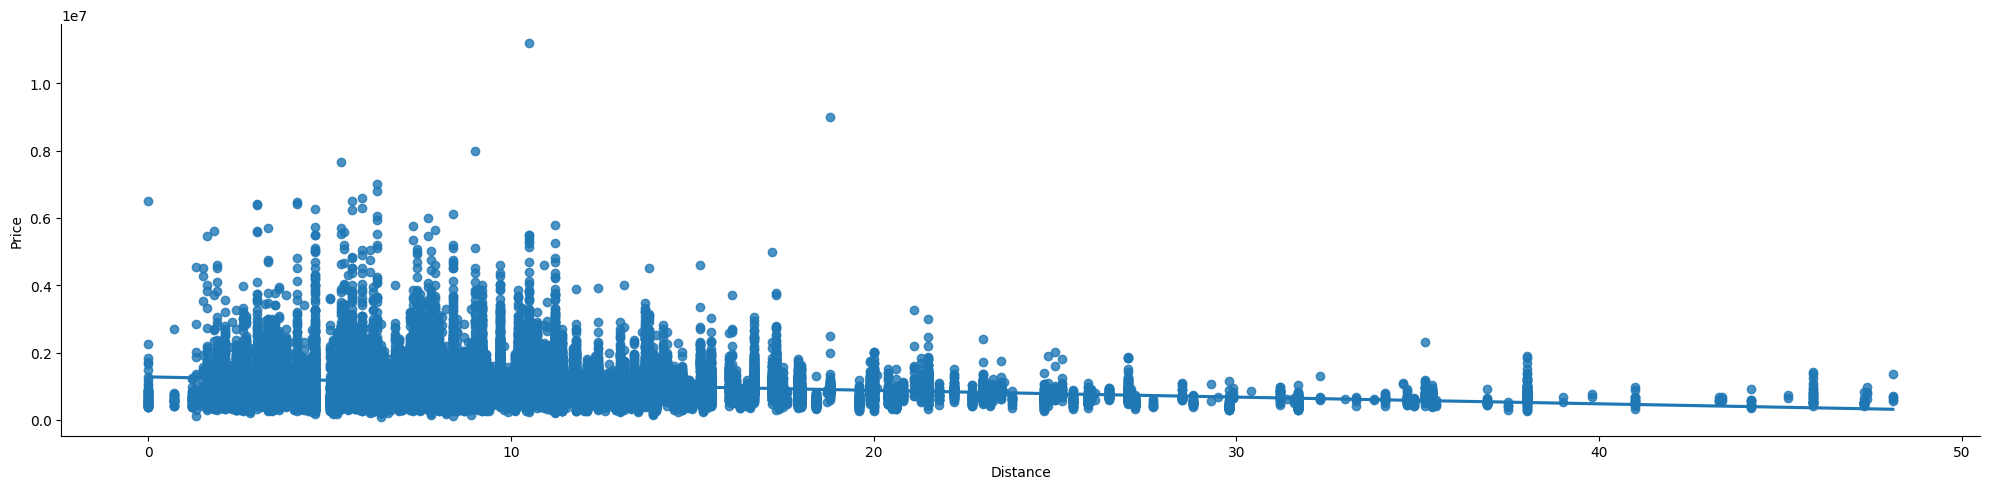

In [ ]:
sns.lmplot(data=data, x='Distance', y='Price', height=5, aspect=4)

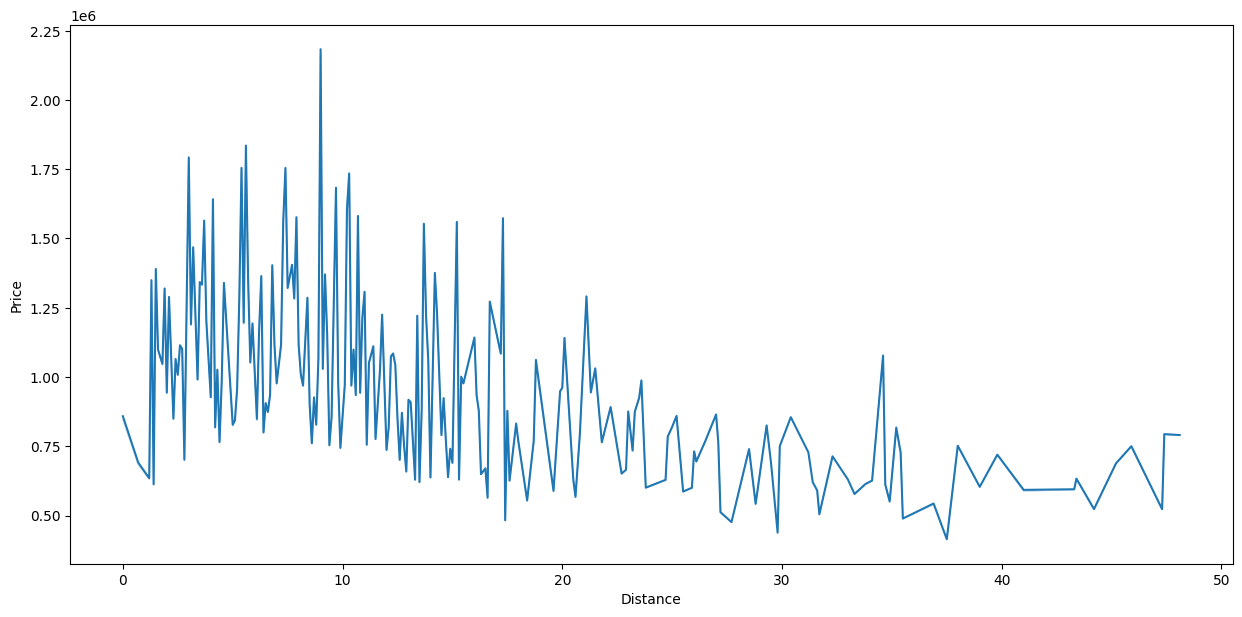

In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=data, x='Distance', y='Price', errorbar=('ci', False));

# use of pd.cut()
**syntax: pd.cut(x, bins, labels=None, right=False) <br>**

Always user **right = False**, else it ignores the left value (not right value)

bins:
* 0-15 km
* 15-30 km
* 30-50 km

```python
data['Distance_bins'] = pd.cut(data['Distance'], bins=[0,15,30,50], labels=['Nearby', 'ModeratelyClose', 'Far'], right=False)
data.head()
```

In [ ]:
data['Distance_bins'] = pd.cut(data['Distance'], bins=[0,15,30,50], labels=['Nearby', 'ModeratelyClose', 'Far'], right=False)
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby


In [ ]:
data[(data['Distance_bins'] == 'Nearby')| (data['Distance_bins'] == 'ModeratelyClose')]


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,13.0,ModeratelyClose
27099,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,8.0,Nearby
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,12.0,ModeratelyClose
27101,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.0,ModeratelyClose


In [ ]:
data.query("Distance_bins == 'Nearby' or Distance_bins == 'ModeratelyClose'")


,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,13.0,ModeratelyClose
27099,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,8.0,Nearby
27100,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,12.0,ModeratelyClose
27101,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.0,ModeratelyClose


<Axes: xlabel='Distance_bins', ylabel='Price'>

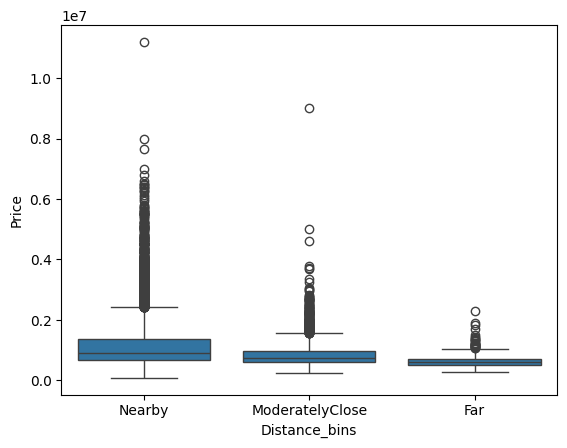

In [ ]:
sns.boxplot(data=data, x='Distance_bins', y='Price')

<Axes: xlabel='Distance_bins', ylabel='Price'>

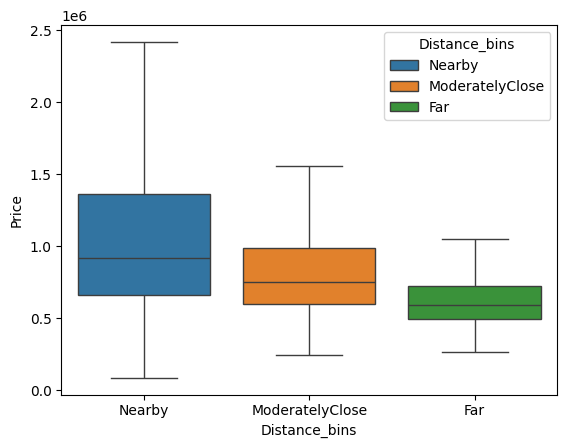

In [ ]:
sns.boxplot(data=data, x='Distance_bins', y='Price', showfliers=False, hue='Distance_bins')

In [ ]:
fig = px.box(data, x='Distance_bins', y='Price', points='all') # points = all will also give you a strip plot
fig.show()

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby


In [ ]:
data['Date']

0       2016-09-03
1       2016-09-03
2       2016-09-03
3       2016-09-03
4       2016-09-03
           ...    
27098   2017-09-30
27099   2017-09-30
27100   2017-09-30
27101   2017-09-30
27102   2017-09-30
Name: Date, Length: 27103, dtype: datetime64[ns]

In [ ]:
year_at_sale = data["Date"].dt.year
year_at_sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int32

In [ ]:
type(year_at_sale)

pandas.core.series.Series

In [ ]:
data['AgeofProp']= year_at_sale - data['YearBuilt']
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0


In [ ]:
data[data['AgeofProp'] == -2]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
21326,Brighton East,2,h,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Southern Metropolitan,6938,1310000,11.0,Nearby,-2.0


In [ ]:
year_at_sale.max()

2018

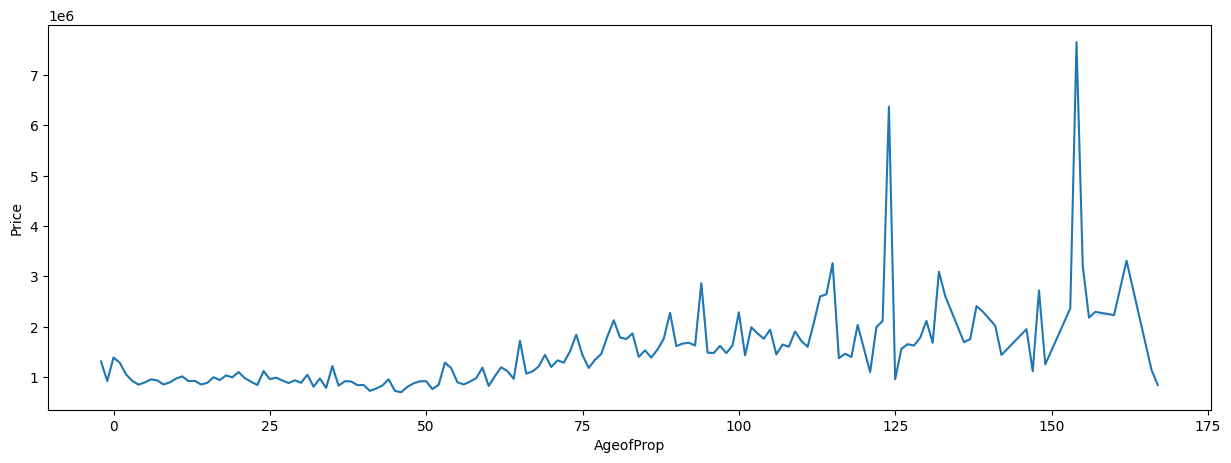

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='AgeofProp', y='Price', errorbar=('ci',False));

# Relative Plot, sns.relplot()

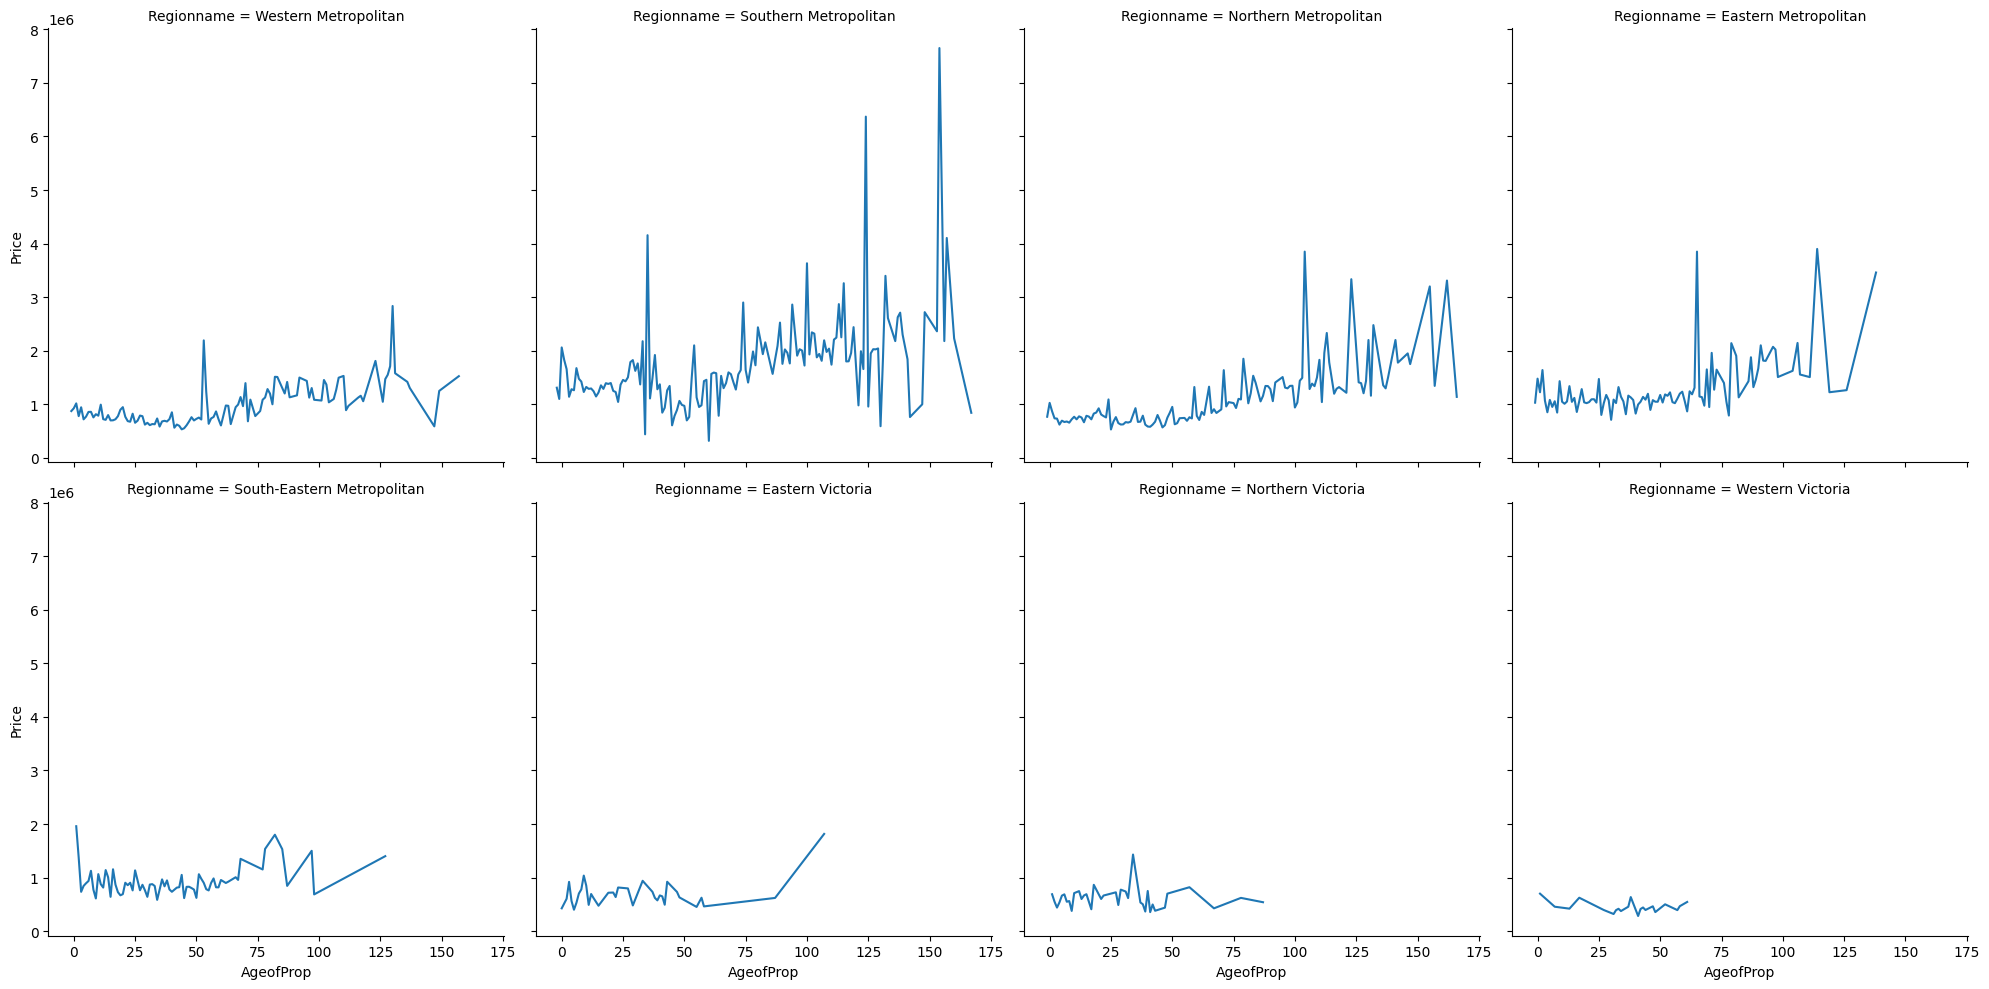

In [ ]:
# Relative Plot
sns.relplot(data=data, x='AgeofProp', y='Price', col='Regionname', kind='line', errorbar=None, col_wrap=4);

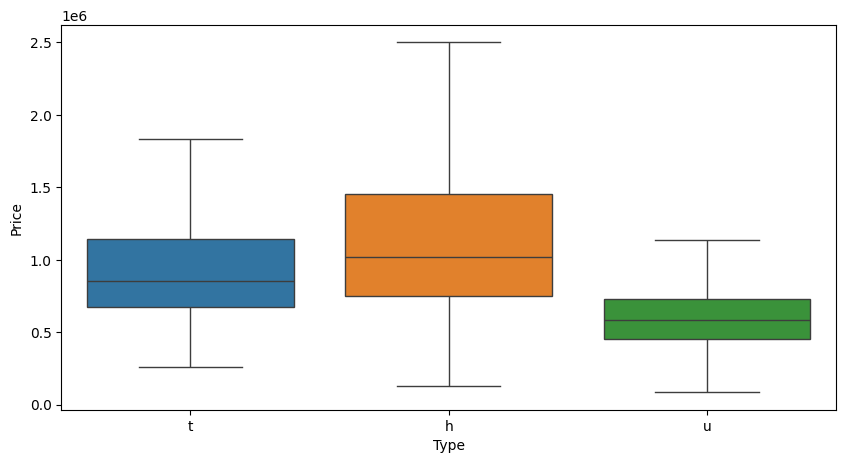

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(data=data, x='Type', y='Price', showfliers=False, hue='Type');

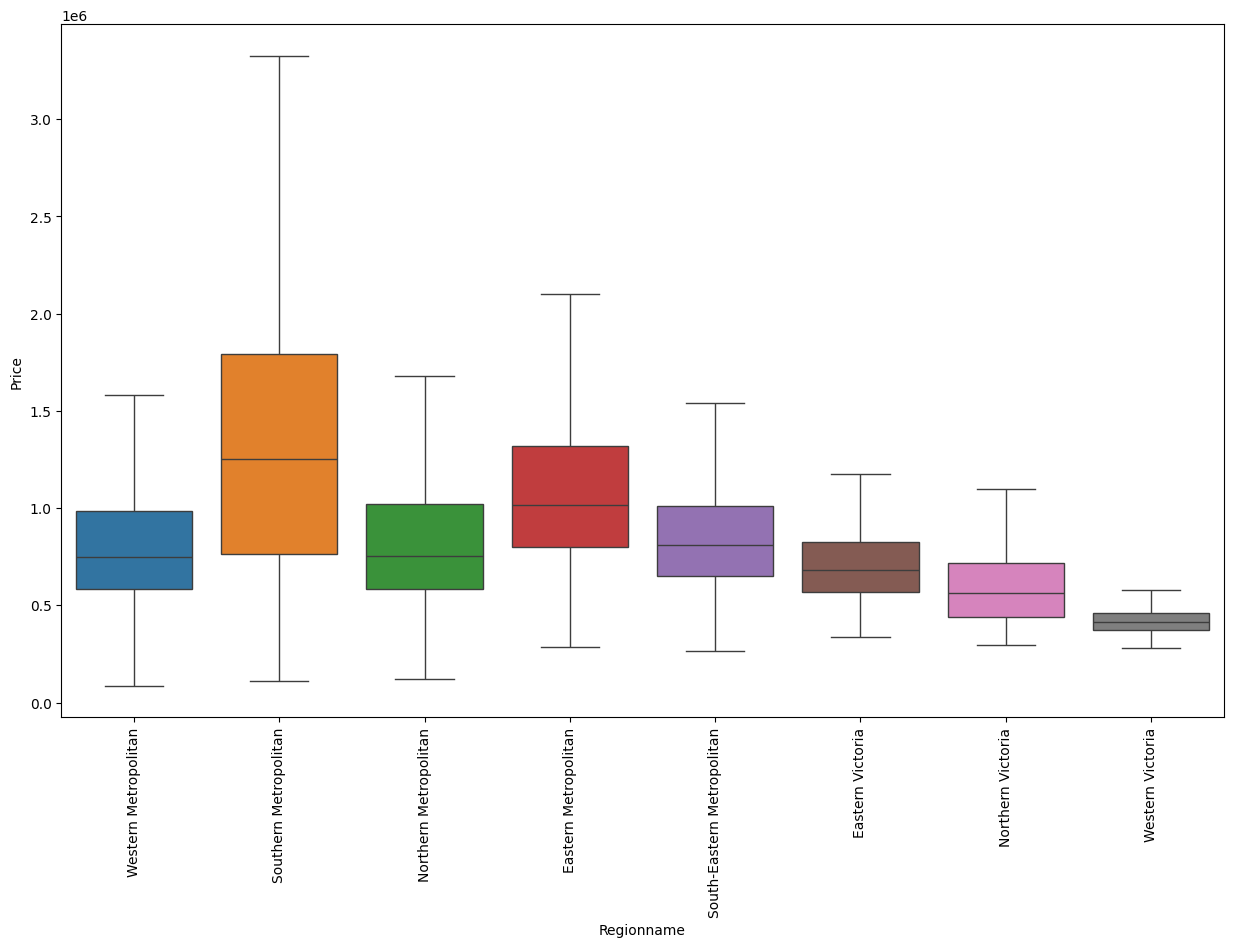

In [ ]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=90)
sns.boxplot(data=data,x='Regionname', y='Price', hue='Regionname', showfliers=False);

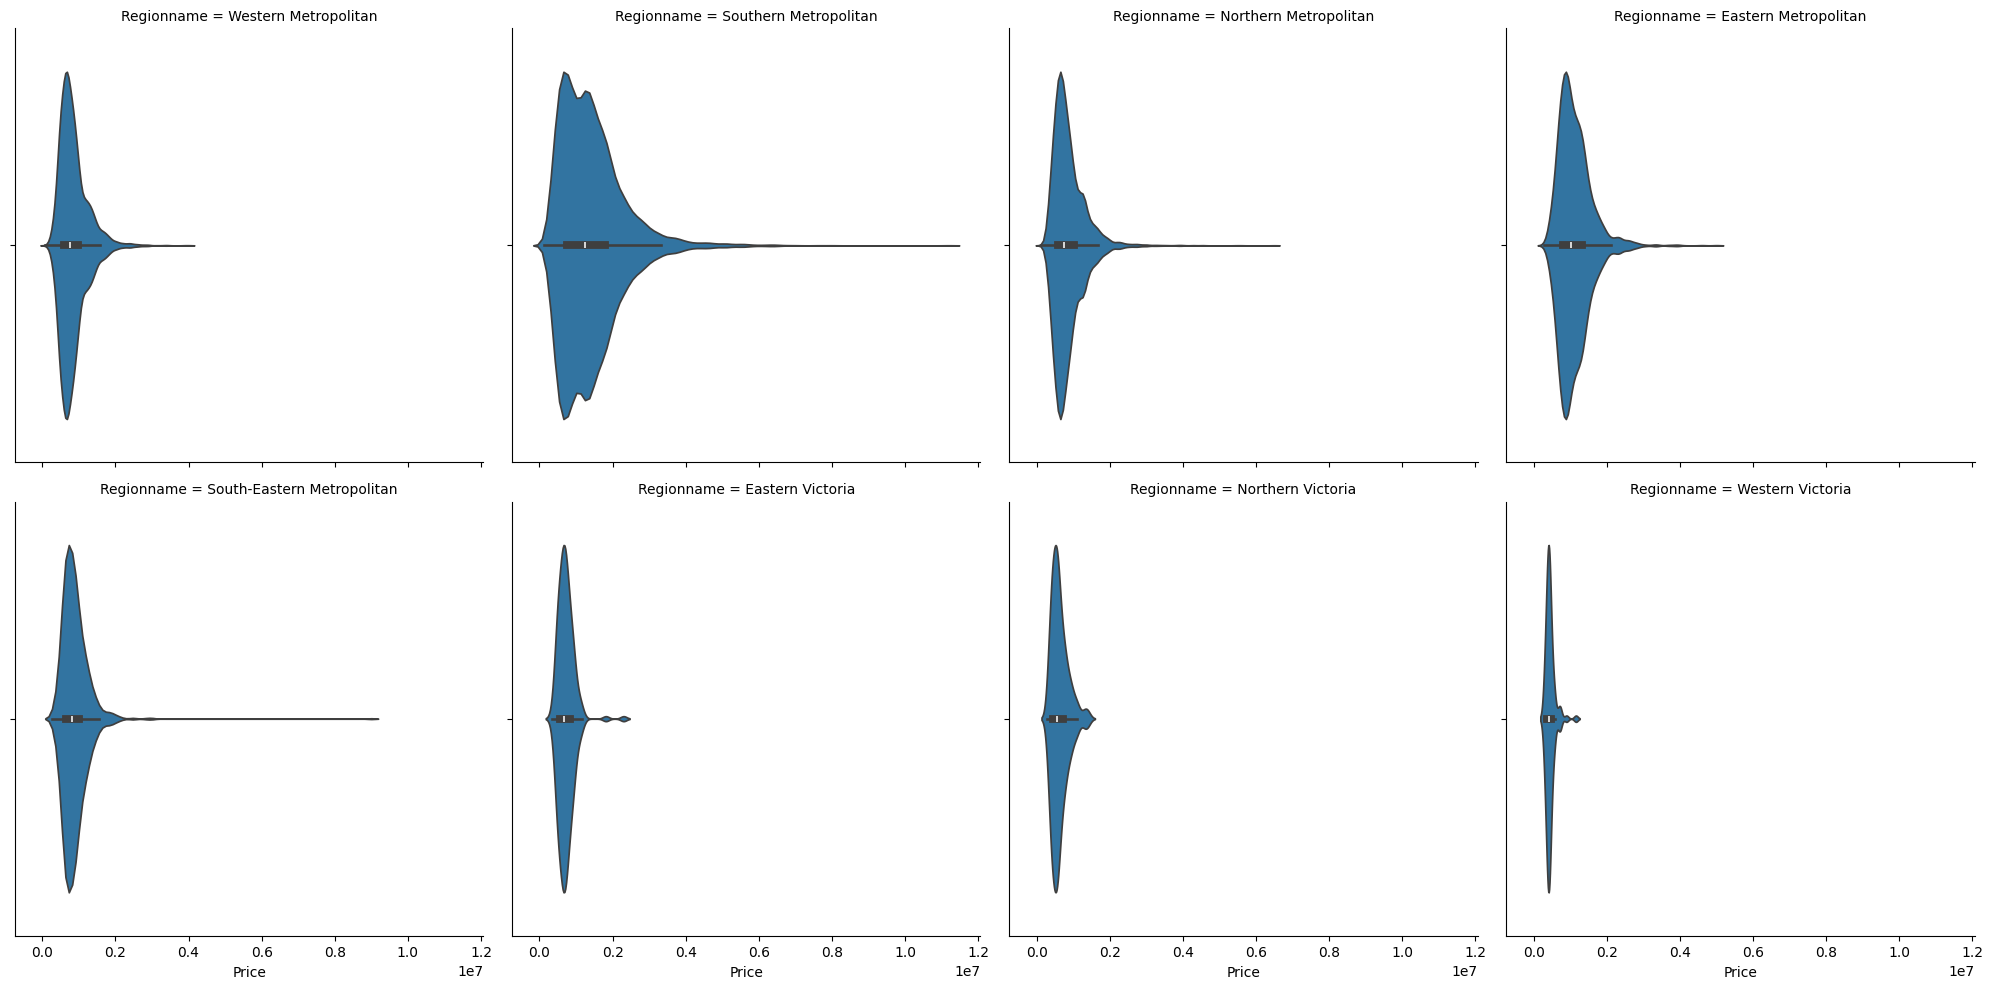

In [ ]:
# Dispersion of price in every region
sns.catplot(x='Price',
            col='Regionname',
            data=data,
            col_wrap=4,
            kind="violin");

# Missing Data

In [ ]:
data.shape

(27103, 19)

In [ ]:
data.shape[0]

27103

In [ ]:
data.isnull() # shows True/False

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27099,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
27100,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
27101,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True


In [ ]:
data[data.isnull()] # dataframe with only True Values

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27098,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27099,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27100,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27101,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum() # shows how many 1s or 0s for each column

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6425
Bathroom          6431
Car               6806
Landsize          9230
BuildingArea     16574
YearBuilt        15118
Regionname           0
Propertycount        0
Price                0
TotalSpace        6806
Distance_bins        1
AgeofProp        15118
dtype: int64

In [ ]:
data.isnull().sum()>0

Suburb           False
Rooms            False
Type             False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom           True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Regionname       False
Propertycount    False
Price            False
TotalSpace        True
Distance_bins     True
AgeofProp         True
dtype: bool

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

Distance             1
Postcode             1
Bedroom           6425
Bathroom          6431
Car               6806
Landsize          9230
BuildingArea     16574
YearBuilt        15118
TotalSpace        6806
Distance_bins        1
AgeofProp        15118
dtype: int64

In [ ]:
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0]})

,Count
Distance,1
Postcode,1
Bedroom,6425
Bathroom,6431
Car,6806
Landsize,9230
BuildingArea,16574
YearBuilt,15118
TotalSpace,6806
Distance_bins,1


## Finally this gives us good numbers of missing data for different columns

In [ ]:
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage': data.isnull().sum()[data.isnull().sum()>0]/data.shape[0] })

,Count,Percentage
Distance,1,0.000037
Postcode,1,0.000037
Bedroom,6425,0.237059
Bathroom,6431,0.237280
Car,6806,0.251116
Landsize,9230,0.340553
BuildingArea,16574,0.611519
YearBuilt,15118,0.557798
TotalSpace,6806,0.251116
Distance_bins,1,0.000037


## Let's look at the row for Distance

In [ ]:
data.loc[data['Distance'].isnull()==True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


## let's look into other houses in that Suburb

In [ ]:
data.loc[data['Suburb']== 'Fawkner Lot']

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


## Just drop that row

In [ ]:
data1 = data.copy()

In [ ]:
data1.drop(9590, axis=0).reset_index() # note an Index Column comes in here. This has the old index

,index,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
0,0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,27098,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,13.0,ModeratelyClose,58.0
27098,27099,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,8.0,Nearby,27.0
27099,27100,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,12.0,ModeratelyClose,22.0
27100,27101,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.0,ModeratelyClose,NaN


In [ ]:
data1.drop(9590, axis=0).reset_index(drop=True) # no index column here

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27097,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,13.0,ModeratelyClose,58.0
27098,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Northern Metropolitan,21650,475000,8.0,Nearby,27.0
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Northern Metropolitan,5833,591000,12.0,ModeratelyClose,22.0
27100,Springvale South,3,h,Harcourts,2017-09-30,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,South-Eastern Metropolitan,4054,780500,9.0,ModeratelyClose,NaN


# now do it to the original dataFrame

In [ ]:
data = data1.copy()

In [ ]:
data.shape

(27103, 19)

# Drop the row with mostly null data

In [ ]:
data = data.drop(9590).reset_index(drop=True) # no index column here

In [ ]:
data.shape

(27102, 19)

In [ ]:
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage': data.isnull().sum()[data.isnull().sum()>0]/data.shape[0] })

,Count,Percentage
Bedroom,6424,0.237030
Bathroom,6430,0.237252
Car,6805,0.251088
Landsize,9229,0.340528
BuildingArea,16573,0.611505
YearBuilt,15117,0.557782
TotalSpace,6805,0.251088
AgeofProp,15117,0.557782


In [ ]:
data.shape

(27102, 19)

In [ ]:
data.loc[data['Bedroom'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
8,Altona North,4,h,hockingstuart,2016-09-03,11.1,3025.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-09-03,11.0,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-09-03,10.5,3034.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-09-03,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-09-03,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.4,3131.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,ModeratelyClose,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.7,3150.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,ModeratelyClose,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.1,3083.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


In [ ]:
data.loc[data['Bedroom'].isnull()==True]['Bathroom'].value_counts(dropna=False)

Bathroom
NaN    6424
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True]['Car'].value_counts(dropna=False)

Car
NaN    6424
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True]['Landsize'].value_counts(dropna=False)

Landsize
NaN      6418
594.0       1
446.0       1
338.0       1
250.0       1
549.0       1
239.0       1
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True]['BuildingArea'].value_counts(dropna=False)

BuildingArea
NaN    6424
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()==True]['YearBuilt'].value_counts(dropna=False)

YearBuilt
NaN    6424
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()]['Suburb'].value_counts(dropna=False)

Suburb
Reservoir          236
Bentleigh East     144
St Kilda           116
Glenroy            116
Richmond           111
                  ... 
Cranbourne East      1
Melton West          1
New Gisborne         1
Scoresby             1
Plenty               1
Name: count, Length: 307, dtype: int64

In [ ]:
data['Suburb'].nunique() # No of uniques

344

In [ ]:
data.loc[data['Bedroom'].isnull()]['Regionname'].value_counts(dropna=False)

Regionname
Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: count, dtype: int64

In [ ]:
data.loc[data['Bedroom'].isnull()]['Regionname'].value_counts(dropna=True) # same because there are no NaN

Regionname
Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: count, dtype: int64

In [ ]:
data.groupby(['Regionname','Type'])[['Bedroom','Bathroom', 'Car']].mean()

Bedroom  Bathroom       Car
Regionname                 Type                              
Eastern Metropolitan       h     3.551948  1.806961  1.946176
                           t     3.032051  1.852564  1.673077
                           u     2.357143  1.263393  1.290179
Eastern Victoria           h     3.559701  1.880597  2.098485
                           u     2.666667  1.000000  1.333333
Northern Metropolitan      h     3.106336  1.467878  1.684897
                           t     2.567198  1.619590  1.362187
                           u     1.878049  1.160127  1.092652
Northern Victoria          h     3.496403  1.892086  2.145985
                           u     3.000000  2.000000  2.000000
South-Eastern Metropolitan h     3.475924  1.713326  2.093574
                           t     2.886792  1.849057  1.679245
                           u     2.260274  1.205479  1.342466
Southern Metropolitan      h     3.383430  1.840283  1.882764
                           t     3.024014  2.012027  1.779690
                           u     1.938541  1.190805  1.134870
Western Metropolitan       h     3.244238  1.576159  1.906782
                           t     2.879747  1.850794  1.538217
                           u     2.106339  1.192229  1.143737
Western Victoria           h     3.379310  1.448276  2.060241

## fillna(): Replaces NaN with some value, use with transfrom

**data['column'].fillna(value=x)**

```python
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname', 'Type'])['Bedroom'].transform('mean')) # Fills the NaN values of Bedroom with mean for the corresponding Regionname and Type
```

In [ ]:
data['Bedroom'] = data['Bedroom'].fillna(value = data.groupby(['Regionname', 'Type'])['Bedroom'].transform('mean')) # Fills the NaN values of Bedroom with mean for the corresponding Regionname and Type

In [ ]:
data['Bathroom'] = data['Bathroom'].fillna(value = data.groupby(['Regionname', 'Type'])['Bathroom'].transform('mean')) # Fills the NaN values of Bedroom with mean for the corresponding Regionname and Type

In [ ]:
data['Car'] = data['Bedroom'].fillna(value = data.groupby(['Regionname', 'Type'])['Car'].transform('mean')) # Fills the NaN values of Bedroom with mean for the corresponding Regionname and Type

## now check for missing data again

## Bedroom NaN is gone

In [ ]:
pd.DataFrame({'Count': data.isnull().sum()[data.isnull().sum()>0], 'Percentage': data.isnull().sum()[data.isnull().sum()>0]/data.shape[0] })

,Count,Percentage
Landsize,9229,0.340528
BuildingArea,16573,0.611505
YearBuilt,15117,0.557782
TotalSpace,6805,0.251088
AgeofProp,15117,0.557782


In [ ]:
data.loc[data['Bedroom'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp


## Make Bedroom, Bathroom and Car to be integers
```python
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)
```

In [ ]:
data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)

In [ ]:
data.loc[data['Bedroom']]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,TotalSpace,Distance_bins,AgeofProp
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2,1,2,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2,1,2,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3,2,3,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27102 non-null  object        
 1   Rooms          27102 non-null  int64         
 2   Type           27102 non-null  object        
 3   SellerG        27102 non-null  object        
 4   Date           27102 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        27102 non-null  int64         
 8   Bathroom       27102 non-null  int64         
 9   Car            27102 non-null  int64         
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27102 non-null  object        
 14  Propertycount  27102 non-null  int64         
 15  Price          2710

# drop the Total Space colum

In [ ]:
data.drop('TotalSpace', axis=1, inplace=True)

## new Total space column

In [ ]:
data['TotalSpaceNew'] =  data['Rooms']+ data['Bedroom'] + data['Bathroom'] + data['Car']
data['TotalSpaceNew'] =  data['TotalSpaceNew'].astype(int)

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,TotalSpaceNew
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,3,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,11
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,2,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,7
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2,1,2,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,Nearby,NaN,7
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,12
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3,2,3,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,Nearby,3.0,11


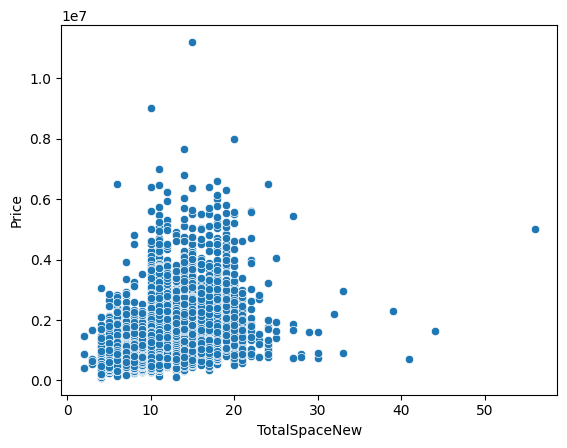

In [ ]:
sns.scatterplot(data=data,x="TotalSpaceNew", y='Price');

In [ ]:
data['Landsize'] = data['Landsize'].fillna(value = data.groupby(['Regionname','Type'])['Landsize'].transform('median'))

In [ ]:
# checking if all the missing values were imputed in Landsize column
pd.DataFrame({'Count':data.isnull().sum()[data.isnull().sum()>0],'Percentage':(data.isnull().sum()[data.isnull().sum()>0]/data.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
AgeofProp,15117,55.778171


In [ ]:
data[data['BuildingArea'].notnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,TotalSpaceNew
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,3,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,11
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,2,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,7
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,12
5,Altona,3,h,Greg,2016-09-03,13.8,3018.0,3,2,3,352.0,242.0,2015.0,Western Metropolitan,5301,520000,Nearby,1.0,11
6,Altona North,5,h,FN,2016-09-03,11.1,3025.0,5,3,5,592.0,251.0,1965.0,Western Metropolitan,5132,1085000,Nearby,51.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27094,Maidstone,2,h,Biggin,2017-09-30,6.4,3012.0,2,1,2,300.0,108.0,1950.0,Western Metropolitan,3873,611500,Nearby,67.0,7
27097,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3,1,3,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,ModeratelyClose,58.0,10
27098,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3,1,3,50.0,105.0,1990.0,Northern Metropolitan,21650,475000,Nearby,27.0,10
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4,2,4,482.0,225.0,1995.0,Northern Metropolitan,5833,591000,ModeratelyClose,22.0,14


In [ ]:
data[data['BuildingArea'].isnull()==False]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,TotalSpaceNew
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,3,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,11
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,2,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,7
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,12
5,Altona,3,h,Greg,2016-09-03,13.8,3018.0,3,2,3,352.0,242.0,2015.0,Western Metropolitan,5301,520000,Nearby,1.0,11
6,Altona North,5,h,FN,2016-09-03,11.1,3025.0,5,3,5,592.0,251.0,1965.0,Western Metropolitan,5132,1085000,Nearby,51.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27094,Maidstone,2,h,Biggin,2017-09-30,6.4,3012.0,2,1,2,300.0,108.0,1950.0,Western Metropolitan,3873,611500,Nearby,67.0,7
27097,Noble Park,3,h,C21,2017-09-30,22.7,3174.0,3,1,3,569.0,130.0,1959.0,South-Eastern Metropolitan,11806,627500,ModeratelyClose,58.0,10
27098,Reservoir,3,u,RW,2017-09-30,12.0,3073.0,3,1,3,50.0,105.0,1990.0,Northern Metropolitan,21650,475000,Nearby,27.0,10
27099,Roxburgh Park,4,h,Raine,2017-09-30,20.6,3064.0,4,2,4,482.0,225.0,1995.0,Northern Metropolitan,5833,591000,ModeratelyClose,22.0,14


In [ ]:
# Taking option 1 to remove the 61% null values from the building area column
new_data = data[data['BuildingArea'].notnull()]
new_data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Distance_bins,AgeofProp,TotalSpaceNew
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,3,303.0,225.0,2016.0,Western Metropolitan,3464,840000,Nearby,0.0,11
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,2,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,Nearby,116.0,7
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,Nearby,86.0,12
5,Altona,3,h,Greg,2016-09-03,13.8,3018.0,3,2,3,352.0,242.0,2015.0,Western Metropolitan,5301,520000,Nearby,1.0,11
6,Altona North,5,h,FN,2016-09-03,11.1,3025.0,5,3,5,592.0,251.0,1965.0,Western Metropolitan,5132,1085000,Nearby,51.0,18


In [ ]:
new_data.shape

(10529, 19)

In [ ]:
# Option 2 -  dropping columns BuildingArea, YearBuilt, and AgeofProp from the data frame
data = data.drop(['BuildingArea','YearBuilt','AgeofProp'],axis=1)

In [ ]:
data.shape

(27102, 16)

In [ ]:
data.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bins,TotalSpaceNew
0,Airport West,3,t,Nelson,2016-09-03,13.5,3042.0,3,2,3,303.0,Western Metropolitan,3464,840000,Nearby,11
1,Albert Park,2,h,hockingstuart,2016-09-03,3.3,3206.0,2,1,2,120.0,Southern Metropolitan,3280,1275000,Nearby,7
2,Albert Park,2,h,Thomson,2016-09-03,3.3,3206.0,2,1,2,159.0,Southern Metropolitan,3280,1455000,Nearby,7
3,Alphington,4,h,Brace,2016-09-03,6.4,3078.0,3,2,3,853.0,Northern Metropolitan,2211,2000000,Nearby,12
4,Alphington,3,h,Jellis,2016-09-03,6.4,3078.0,3,2,3,208.0,Northern Metropolitan,2211,1110000,Nearby,11


In [ ]:
data.to_csv('SM-Melbourne_Housing_NoMissing.csv',index=False)

# Outliers

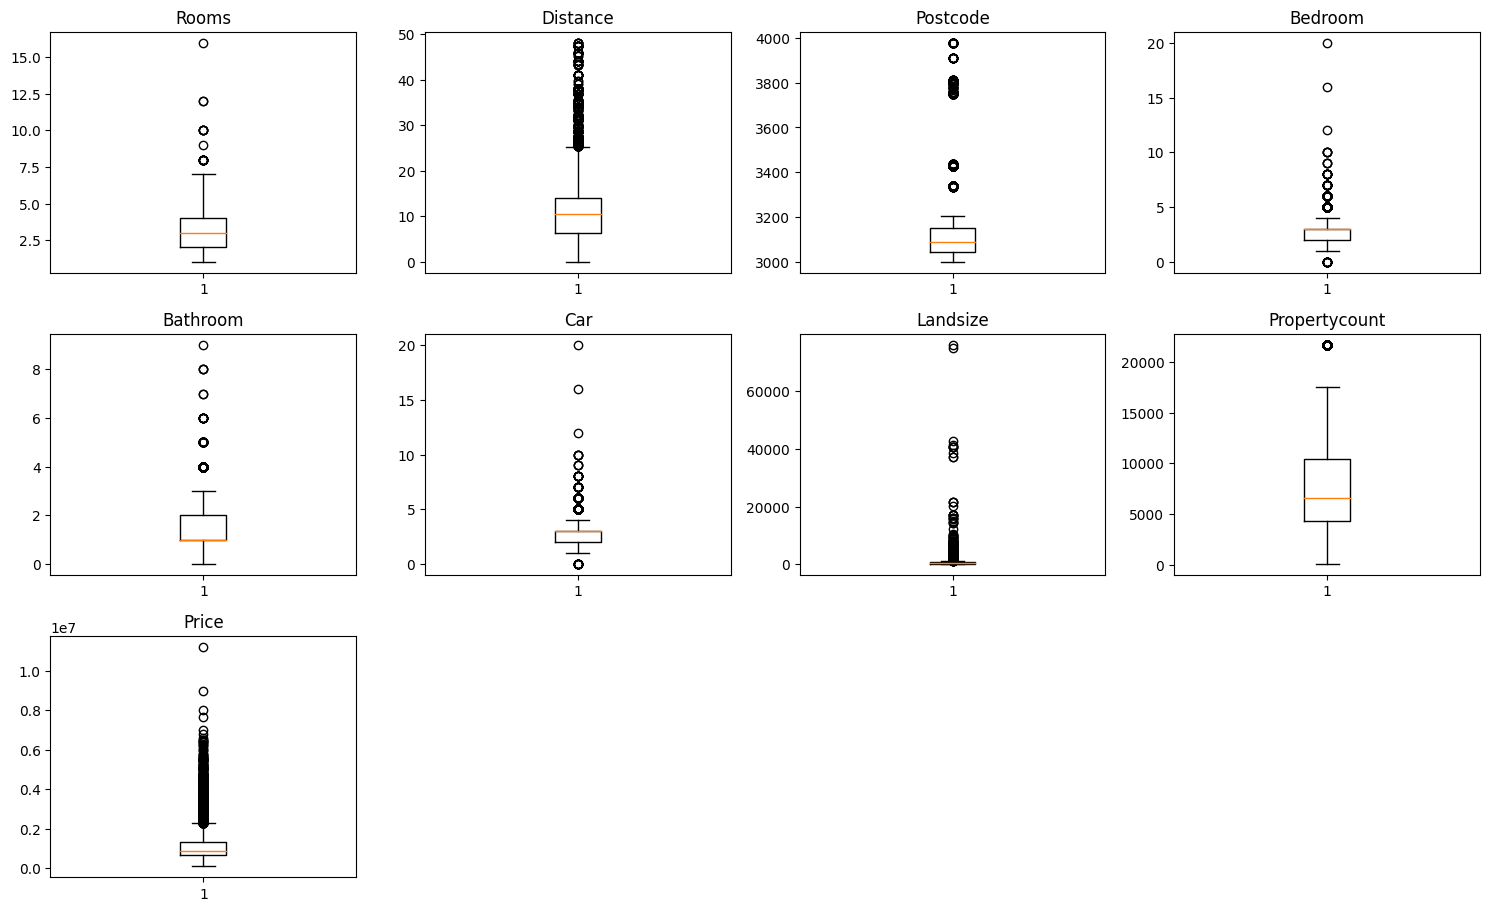

In [ ]:
numeric_columns = ['Rooms', 'Distance', 'Postcode','Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']

plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(4, 4, i+1)
  plt.boxplot(data[variable], whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show();


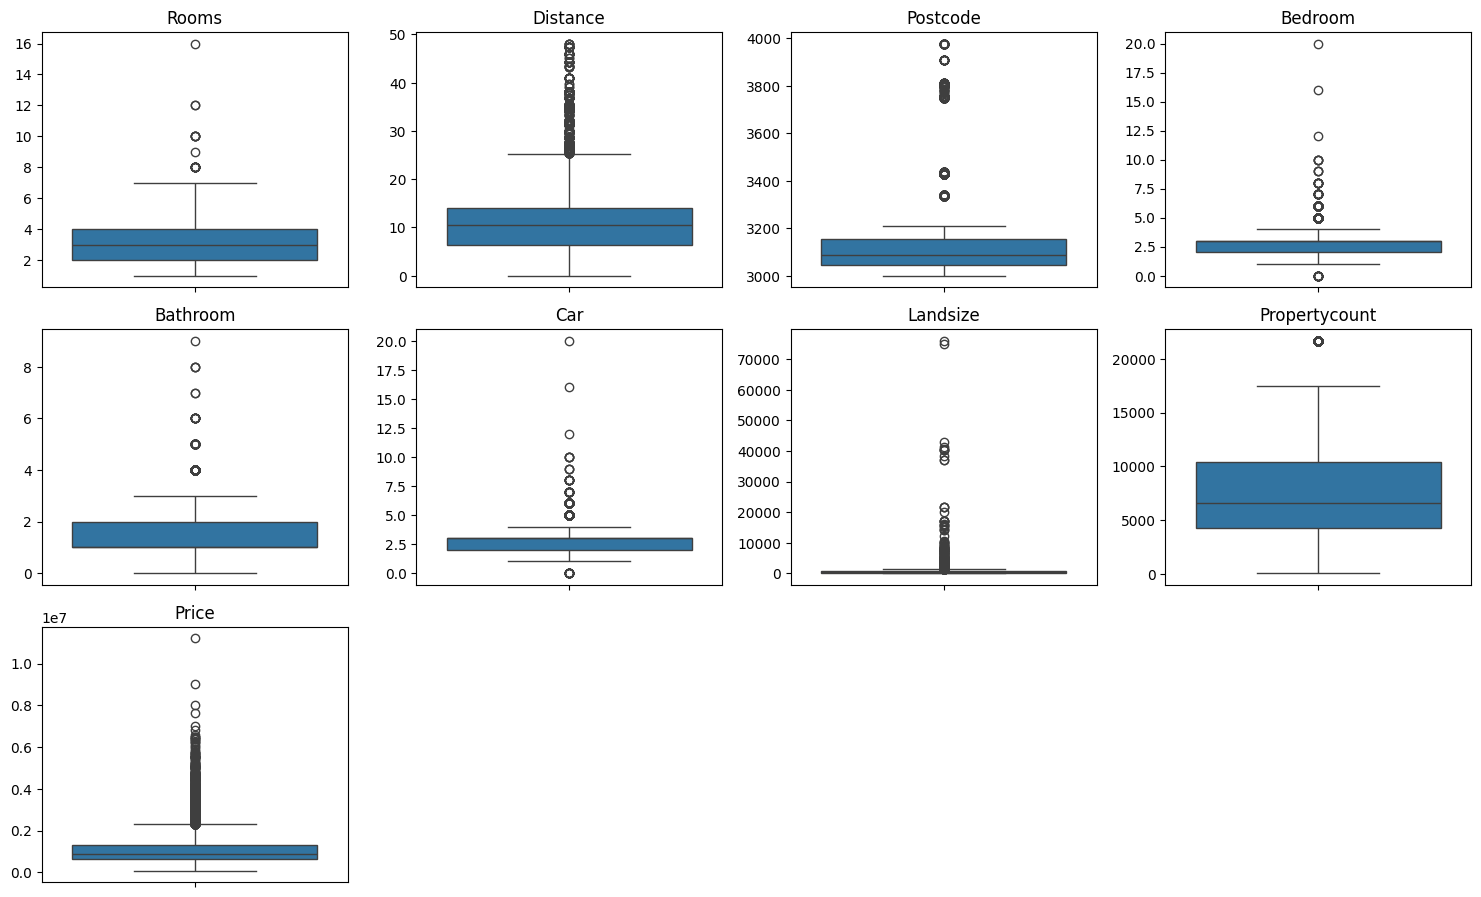

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your numeric columns
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']

# Create a figure to host the subplots
plt.figure(figsize=(15, 12))

# Loop through the numeric columns and create a subplot for each one
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)  # Create a subplot in a 4x4 layout, i+1 means where to put the grid
    sns.boxplot(y=data[variable], whis=1.5)  # Use Seaborn's boxplot function # plt.boxplot(data[variable], whis=1.5) -would be if using matplotlib
    plt.title(variable)  # Set the title for each subplot
    plt.ylabel("") # moving ylabel, because by default, seems like seaborn puts it in and it's distracting here

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()  # Display the figure with the plots


In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
data[numeric_columns]

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Propertycount,Price
0,3,13.5,3042.0,3,2,3,303.0,3464,840000
1,2,3.3,3206.0,2,1,2,120.0,3280,1275000
2,2,3.3,3206.0,2,1,2,159.0,3280,1455000
3,4,6.4,3078.0,3,2,3,853.0,2211,2000000
4,3,6.4,3078.0,3,2,3,208.0,2211,1110000
...,...,...,...,...,...,...,...,...,...
27097,3,22.7,3174.0,3,1,3,569.0,11806,627500
27098,3,12.0,3073.0,3,1,3,50.0,21650,475000
27099,4,20.6,3064.0,4,2,4,482.0,5833,591000
27100,3,22.2,3172.0,3,2,3,544.0,4054,780500


In [ ]:
Q1

Rooms                 2.0
Distance              6.4
Postcode           3046.0
Bedroom               2.0
Bathroom              1.0
Car                   2.0
Landsize            189.0
Propertycount      4294.0
Price            635000.0
Name: 0.25, dtype: float64

In [ ]:
lower_whisker

Rooms                -1.0
Distance             -5.0
Postcode           2885.5
Bedroom               0.5
Bathroom             -0.5
Car                   0.5
Landsize           -469.5
Propertycount     -4883.0
Price           -362500.0
dtype: float64

In [ ]:
# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

Rooms            0.084865
Distance         4.342853
Postcode         2.911224
Bedroom          4.195262
Bathroom         0.870784
Car              4.195262
Landsize         1.741569
Propertycount    2.671390
Price            4.660173
dtype: float64

In [ ]:
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker))

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Propertycount,Price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
27097,False,False,False,False,False,False,False,False,False
27098,False,False,False,False,False,False,False,True,False
27099,False,False,False,False,False,False,False,False,False
27100,False,False,False,False,False,False,False,False,False


In [ ]:
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()

Rooms              23
Distance         1177
Postcode          789
Bedroom          1137
Bathroom          236
Car              1137
Landsize          472
Propertycount     724
Price            1263
dtype: int64

In [ ]:
(data[data[((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker))]['Rooms'].notna()]['Rooms']).size

23

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [ ]:
type(data['Rooms'])

pandas.core.series.Series

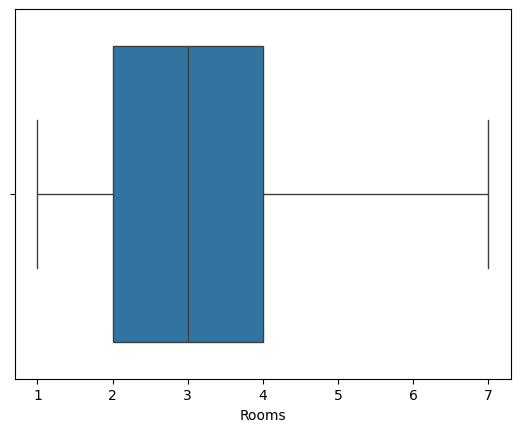

In [ ]:
data = treat_outliers(data,'Rooms')

# visualizing the column after outlier treatment
sns.boxplot(data=data,x='Rooms')
plt.show()

In [ ]:
# treating outliers of Bedroom column
data = treat_outliers(data,'Bedroom')

# treating outliers of Car column
data = treat_outliers(data,'Car')

# treating outliers of Bathroom column
data = treat_outliers(data,'Bathroom')

# treating outliers of Landsize column
data = treat_outliers(data,'Landsize')

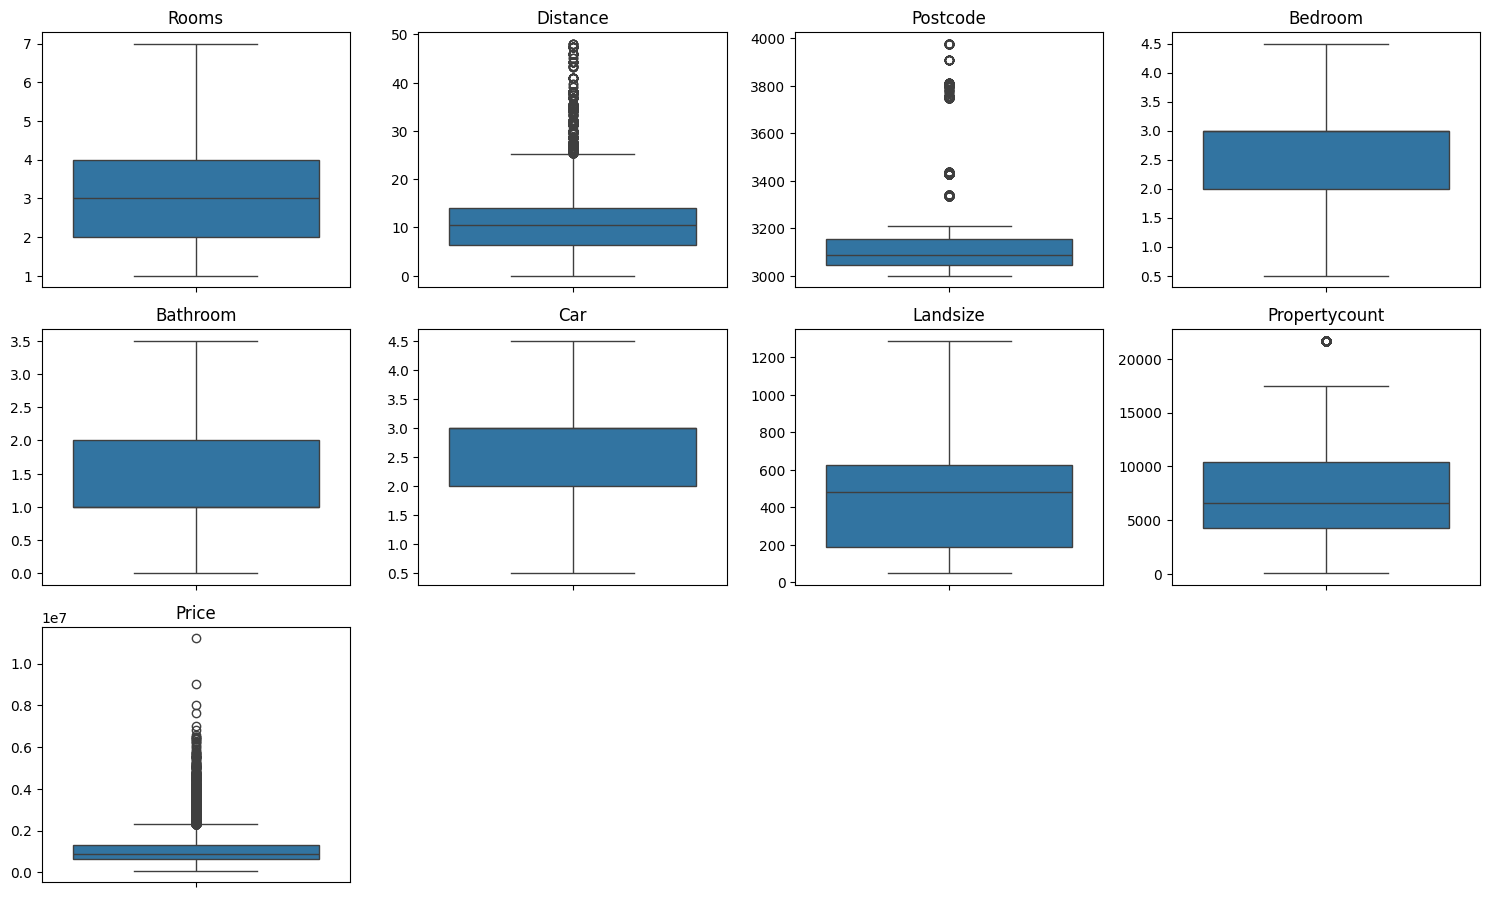

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your numeric columns
numeric_columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']

# Create a figure to host the subplots
plt.figure(figsize=(15, 12))

# Loop through the numeric columns and create a subplot for each one
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)  # Create a subplot in a 4x4 layout, i+1 means where to put the grid
    sns.boxplot(y=data[variable], whis=1.5)  # Use Seaborn's boxplot function # plt.boxplot(data[variable], whis=1.5) -would be if using matplotlib
    plt.title(variable)  # Set the title for each subplot
    plt.ylabel("") # moving ylabel, because by default, seems like seaborn puts it in and it's distracting here

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()  # Display the figure with the plots

In [ ]:
# change to integer

data['Bedroom'] = data['Bedroom'].astype(int)
data['Bathroom'] = data['Bathroom'].astype(int)
data['Car'] = data['Car'].astype(int)


In [ ]:
data.to_csv('sm_no_outliers')

In [ ]:
%%shell
jupyter nbconvert --to html
jupyter nbconvert SM_EDA.ipynb --to html

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr